In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

from sklearn.metrics import accuracy_score


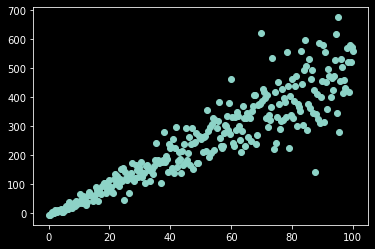

In [2]:
hetero=pd.read_csv('heteroscedastic.csv')
plt.scatter(hetero['x'],hetero['y'])
plt.show()

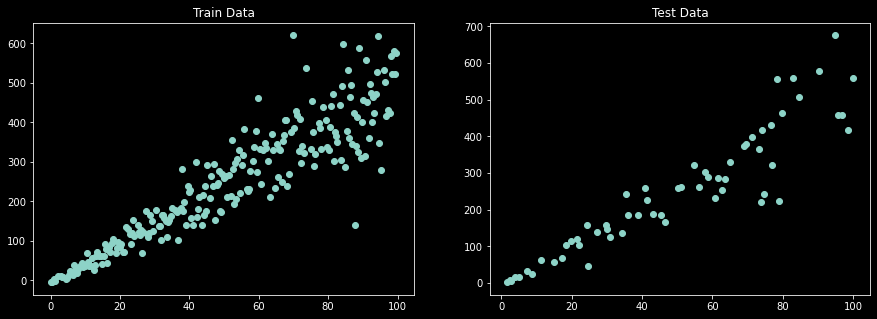

In [3]:
train, test = train_test_split(hetero, test_size=0.2,random_state=0)

fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(train['x'],train['y'])
ax[0].set_title("Train Data")

ax[1].scatter(test['x'],test['y'])
ax[1].set_title("Test Data")
plt.show()

In [4]:
def polyRegression(x,y,degree):
    X = np.array([x**i for i in range(degree+1)]).astype(np.float32).T
    X_inv = np.linalg.inv(X.T@X)
    X_inv_T = X_inv@X.T
    weights = X_inv_T@y
    return weights
    

In [5]:
# lmda ranges from 0 to 1 
# when lmda = 0 that means No Regulazation

def regularization(x,y,degree,lmda):
    X = np.array([x**i for i in range(degree+1)]).astype(np.float32).T
    reg_term = lmda * np.identity(degree+1)
    X_inv = np.linalg.inv(X.T@X + reg_term)
    X_inv_T = X_inv@X.T
    weights = X_inv_T@y
    return weights
    

In [6]:
weights_4 = polyRegression(train['x'],train['y'],4)
weights_3 = polyRegression(train['x'],train['y'],3)
print("weights of Polynomial with 4-degree = \n",weights_4)
print("weights of Polynomial with 3-degree = \n",weights_3)


weights of Polynomial with 4-degree = 
 [ 6.63904120e+00  1.65588921e+00  1.58877013e-01 -2.45331229e-03
  1.18992557e-05]
weights of Polynomial with 3-degree = 
 [-1.02960203e+01  5.03301327e+00  6.78390598e-03 -8.04089758e-05]


In [7]:
reg_weights_4 = regularization(train['x'],train['y'],4,0.8)
reg_weights_3 = regularization(train['x'],train['y'],3,0.8)
print("weights of Polynomial with 4-degree = \n",weights_4)
print("weights of Polynomial with 3-degree = \n",weights_3)
     

weights of Polynomial with 4-degree = 
 [ 6.63904120e+00  1.65588921e+00  1.58877013e-01 -2.45331229e-03
  1.18992557e-05]
weights of Polynomial with 3-degree = 
 [-1.02960203e+01  5.03301327e+00  6.78390598e-03 -8.04089758e-05]


In [8]:
x_train_4 = np.array([train['x']**i for i in range(5)]).astype(np.float32).T
x_train_3 = np.array([train['x']**i for i in range(4)]).astype(np.float32).T

y_train_4 = np.matmul(x_train_4,weights_4)
y_train_3 = np.matmul(x_train_3,weights_3)

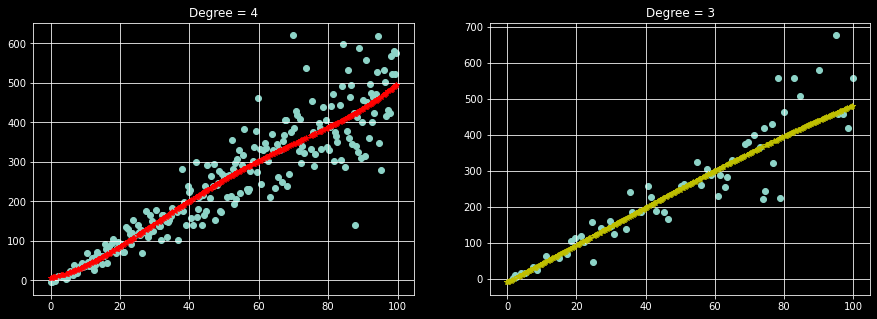

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(train['x'],train['y'])
ax[0].plot(train['x'],y_train_4,'*r')
ax[0].set_title("Degree = 4")
ax[0].grid()

ax[1].scatter(test['x'],test['y'])
ax[1].plot(train['x'],y_train_3,'*y')
ax[1].set_title("Degree = 3")
ax[1].grid()


# plt.ylim(-1e8, 1e8)
plt.show()

In [10]:
x_test_4 = np.array([test['x']**i for i in range(5)]).astype(np.float32).T
x_test_3 = np.array([test['x']**i for i in range(4)]).astype(np.float32).T
y_hat_4 = np.matmul(x_test_4,weights_4)
y_hat_3 = np.matmul(x_test_3,weights_3)

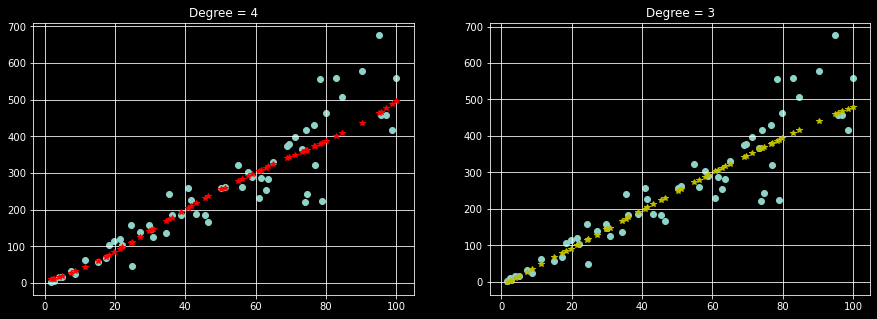

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(test['x'],test['y'])
ax[0].plot(test['x'],y_hat_4,'*r')
ax[0].set_title("Degree = 4")
ax[0].grid()

ax[1].scatter(test['x'],test['y'])
ax[1].plot(test['x'],y_hat_3,'*y')
ax[1].set_title("Degree = 3")
ax[1].grid()


# plt.ylim(-10000, 700)
plt.show()

### R square of Train Data

In [12]:
def R_square(y,y_hat):
    y_bar = np.mean(y)
    ssr = sum((y_hat - y)**2)
    sst = sum((y - y_bar)**2)
    return 1-(ssr/sst)

In [13]:
print("Train R2 of 4-degree = ",R_square(train['y'],y_train_4))
print("Train R2 of 3-degree = ",R_square(train['y'],y_train_3))

Train R2 of 4-degree =  0.8564763274458705
Train R2 of 3-degree =  0.8551595620959642


In [14]:
from sklearn.metrics import r2_score
print("Train R2 of 4-degree = ",r2_score(train['y'],y_train_4))
print("Train R2 of 3-degree = ",r2_score(train['y'],y_train_3))


Train R2 of 4-degree =  0.8564763274458707
Train R2 of 3-degree =  0.8551595620959642


### R square of Test Data

In [15]:
print("Test R2 of 4-degree = ",R_square(test['y'],y_hat_4))
print("Test R2 of 3-degree = ",R_square(test['y'],y_hat_3))

Test R2 of 4-degree =  0.842965382728996
Test R2 of 3-degree =  0.8457971580490632


In [16]:
print("Test R2 of 4-degree = ",r2_score(test['y'],y_hat_4))
print("Test R2 of 3-degree = ",r2_score(test['y'],y_hat_3))

Test R2 of 4-degree =  0.8429653827289961
Test R2 of 3-degree =  0.8457971580490632
